In [19]:
# MeanMachineRex prefers orange cats

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)

In [4]:
# https://data.cityofnewyork.us/browse?sortBy=most_accessed&utf8=%E2%9C%93&Data-Collection_Data-Collection=Forestry+Management+System+%28ForMS%29&pageSize=20&page=1
df_tree_points = pd.read_csv('./data/Forestry_Management_System/Forestry_Tree_Points_20250830.csv')
print('Records:', len(df_tree_points))
print('Columns:', list(df_tree_points.columns))
df_tree_points[:1]

Records: 1089815
Columns: ['OBJECTID', 'DBH', 'TPStructure', 'TPCondition', 'StumpDiameter', 'PlantingSpaceGlobalID', 'Geometry', 'GlobalID', 'GenusSpecies', 'CreatedDate', 'UpdatedDate', 'PlantedDate', 'RiskRating', 'RiskRatingDate', 'Location']


,OBJECTID,DBH,TPStructure,TPCondition,StumpDiameter,PlantingSpaceGlobalID,Geometry,GlobalID,GenusSpecies,CreatedDate,UpdatedDate,PlantedDate,RiskRating,RiskRatingDate,Location
0,11488530,6.0,Full,Fair,NaN,D86F65D3-53B3-4B3D-A7C0-FC18778ACBDA,POINT(-73.77075300216298 40.74800144086034),2197AE85-1F5C-4EC5-8983-1C3AE158E282,Crataegus - Hawthorn,2021-04-20 19:00:57.0000000,NaN,NaN,NaN,NaN,POINT (-73.77075300216298 40.74800144086034)


In [11]:
# https://data.cityofnewyork.us/browse?sortBy=most_accessed&utf8=%E2%9C%93&Data-Collection_Data-Collection=Forestry+Management+System+%28ForMS%29&pageSize=20&page=1
df_planting_spaces = pd.read_csv('./data/Forestry_Management_System/Forestry_Planting_Spaces_20250830.csv')
print('Records:', len(df_planting_spaces))
print('Columns:', list(df_planting_spaces.columns))
df_planting_spaces[:1]

/tmp/ipykernel_2459/1451984601.py:2: DtypeWarning: Columns (9,27,33) have mixed types. Specify dtype option on import or set low_memory=False.
  df_planting_spaces = pd.read_csv('./data/Forestry_Management_System/Forestry_Planting_Spaces_20250830.csv')


Records: 1091709
Columns: ['OBJECTID', 'Borough', 'Number', 'Street', 'PSSite', 'PlantingSpaceOnStreet', 'Width', 'Length', 'ParkName', 'ParkZone', 'CrossStreet1', 'CrossStreet2', 'CommunityBoard', 'SanitationZone', 'Postcode', 'Council District', 'StateSenate', 'StateAssembly', 'Congressional', 'PhysicalID', 'PSStatus', 'Geometry', 'GlobalID', 'CreatedDate', 'UpdatedDate', 'Jurisdiction', 'OverheadUtilities', 'TreeGuard', 'Latitude', 'Longitude', 'Census Tract', 'BIN', 'BBL', 'NTA', 'Location']


,OBJECTID,Borough,Number,Street,PSSite,PlantingSpaceOnStreet,Width,Length,ParkName,ParkZone,CrossStreet1,CrossStreet2,CommunityBoard,SanitationZone,Postcode,Council District,StateSenate,StateAssembly,Congressional,PhysicalID,PSStatus,Geometry,GlobalID,CreatedDate,UpdatedDate,Jurisdiction,OverheadUtilities,TreeGuard,Latitude,Longitude,Census Tract,BIN,BBL,NTA,Location
0,1236278,Queens,39-020,39 ROAD,Street,NaN,NaN,NaN,NaN,NaN,NaN,NaN,411.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Empty,POINT(-73.74008473163144 40.77488119036937),41F1D043-0071-4256-BA71-7118BFA4E709,2015-10-02T18:05:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-73.74008473163144 40.77488119036937)


In [5]:
df_tree_points['TPCondition'].value_counts()

TPCondition
Good         487280
Fair         300160
Dead         117391
Excellent    101824
Poor          46251
Unknown       30793
Critical       6108
Name: count, dtype: int64

In [41]:
df_tree_points_living = df_tree_points[
    (df_tree_points['TPCondition'] != 'Dead') & (df_tree_points['TPCondition'] != 'Unknown')
]
print('Records:', len(df_tree_points_living))
print('Columns:', list(df_tree_points_living.columns))
df_tree_points_living[:1]

Records: 941631
Columns: ['OBJECTID', 'DBH', 'TPStructure', 'TPCondition', 'StumpDiameter', 'PlantingSpaceGlobalID', 'Geometry', 'GlobalID', 'GenusSpecies', 'CreatedDate', 'UpdatedDate', 'PlantedDate', 'RiskRating', 'RiskRatingDate', 'Location']


,OBJECTID,DBH,TPStructure,TPCondition,StumpDiameter,PlantingSpaceGlobalID,Geometry,GlobalID,GenusSpecies,CreatedDate,UpdatedDate,PlantedDate,RiskRating,RiskRatingDate,Location
0,11488530,6.0,Full,Fair,NaN,D86F65D3-53B3-4B3D-A7C0-FC18778ACBDA,POINT(-73.77075300216298 40.74800144086034),2197AE85-1F5C-4EC5-8983-1C3AE158E282,Crataegus - Hawthorn,2021-04-20 19:00:57.0000000,NaN,NaN,NaN,NaN,POINT (-73.77075300216298 40.74800144086034)


In [42]:
df_tree_points_dead = df_tree_points[
    (df_tree_points['TPCondition'] == 'Dead') | (df_tree_points['TPCondition'] == 'Unknown')
]
print('Records:', len(df_tree_points_dead))
print('Columns:', list(df_tree_points_dead.columns))
df_tree_points_dead[:1]

Records: 148184
Columns: ['OBJECTID', 'DBH', 'TPStructure', 'TPCondition', 'StumpDiameter', 'PlantingSpaceGlobalID', 'Geometry', 'GlobalID', 'GenusSpecies', 'CreatedDate', 'UpdatedDate', 'PlantedDate', 'RiskRating', 'RiskRatingDate', 'Location']


,OBJECTID,DBH,TPStructure,TPCondition,StumpDiameter,PlantingSpaceGlobalID,Geometry,GlobalID,GenusSpecies,CreatedDate,UpdatedDate,PlantedDate,RiskRating,RiskRatingDate,Location
25,5139698,0.0,Stump,Unknown,0.0,6A70DD28-BA08-4562-A8BC-4748055045EF,POINT(-73.95096967620049 40.81345388911364),6A70DD28-BA08-4562-A8BC-4748055045EF,Unknown - Unknown,2017-12-20 11:11:11.0000000,NaN,NaN,NaN,NaN,POINT (-73.95096967620049 40.81345388911364)


In [43]:
df_tree_points_living['GenusSpecies'].value_counts(dropna=False)[:10]

GenusSpecies
Platanus x acerifolia - London planetree                                  103513
Gleditsia triacanthos var. inermis - Thornless honeylocust                 74217
Quercus palustris - pin oak                                                69974
Pyrus calleryana - Callery pear                                            56636
Zelkova serrata - Japanese zelkova                                         34297
Acer platanoides - Norway maple                                            31159
Tilia cordata - littleleaf linden                                          30506
Prunus serrulata 'Green leaf' - 'Green leaf' Japanese flowering cherry     25652
Ginkgo biloba - maidenhair tree                                            23776
Acer rubrum - red maple                                                    22703
Name: count, dtype: int64

In [44]:
df_tree_points_living['GenusSpecies'].value_counts(dropna=False)[-10:]

GenusSpecies
Cornus florida 'Cherokee Sunset' - 'Cherokee Sunset' Flowering dogwood    1
Parrotia persica 'Vanessa' - 'Vanessa' Persian ironwood                   1
Malus 'Dolgo' - 'Dolgo' Crabapple                                         1
Pyrus calleryana 'Silver Ball' - 'Silver Ball' Callery pear               1
Sorbus aucuparia 'Cardinal Royal' - 'Cardinal Royal' Mountain ash         1
Thuja occidentalis 'Hetz Wintergreen' - 'Hetz Wintergreen' Arborvitae     1
Styrax japonicus 'Pink Chimes' - 'Pink Chimes' Japanese snowbell          1
Prunus serrula - Tibetan cherry                                           1
Prunus domestica - Domestic Plum                                          1
Carpinus betulus 'Franz Fontaine' - 'Franz Fontaine' European hornbeam    1
Name: count, dtype: int64

In [23]:
df_planting_spaces['Borough'].value_counts(dropna=False)

Borough
Queens           371611
Brooklyn         283820
Bronx            163353
Staten Island    154047
Manhattan        118365
NaN                 513
Name: count, dtype: int64

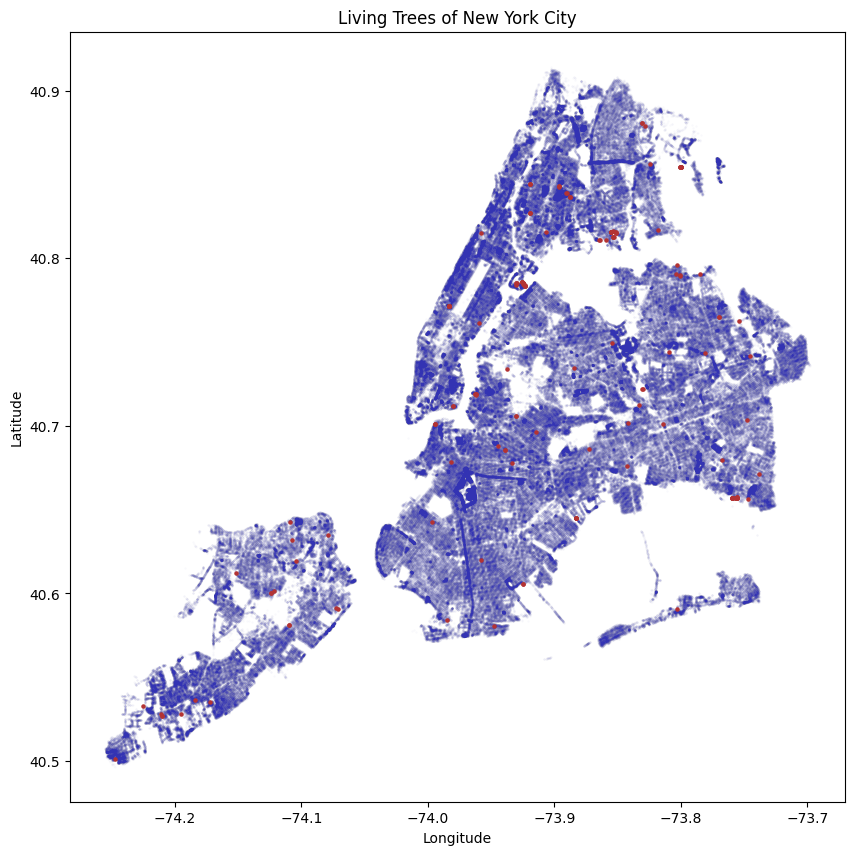

In [102]:
df = df_tree_points_living.copy()
location_lon_lat = df_tree_points_living['Location'].str.replace('POINT (', '').str.replace(')', '').str.split()
df['Longitude'] = location_lon = location_lon_lat.apply(lambda l: float(l[0]))
df['Latitude'] = location_lat = location_lon_lat.apply(lambda l: float(l[1]))

genus_species = 'Populus tremuloides - quaking aspen'
df2 = df[
    df['GenusSpecies'] == genus_species
]

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(df['Longitude'], df['Latitude'], s=0.1, color=(0.2, 0.2, 0.7, 0.05))
ax.scatter(df2['Longitude'], df2['Latitude'], s=5, color=(0.7, 0.2, 0.2, 1.0), label=genus_species)
ax.set_title('Living Trees of New York City')
ax.set_xlabel('Longitude')
ax.set_ylabel('Latitude')
plt.show()

# BONUS STUFF

In [28]:
df_planting_spaces[
    df_planting_spaces['Borough'] == 'Manhattan'
][['Borough', 'NTA']].value_counts(dropna=False)[:20]

Borough    NTA                                        
Manhattan  NaN                                            54860
           Upper East Side-Carnegie Hill                   3585
           Upper West Side (Central)                       3446
           Chelsea-Hudson Yards                            3006
           East Village                                    2613
           East Harlem (North)                             2539
           Harlem (North)                                  2473
           Upper East Side-Lenox Hill-Roosevelt Island     2465
           Hell's Kitchen                                  2441
           Upper East Side-Yorkville                       2329
           /                                               2205
           Murray Hill-Kips Bay                            2118
           East Harlem (South)                             2037
           Washington Heights (South)                      1829
           Harlem (South)                        

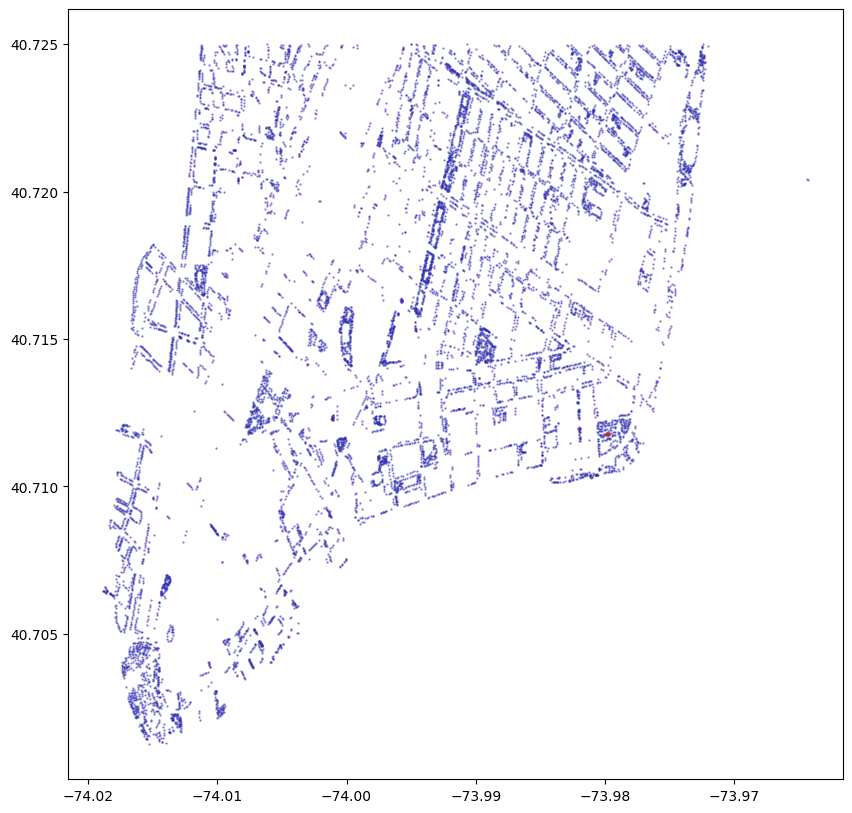

        Longitude   Latitude
673953 -73.979818  40.711783
674836 -73.979742  40.711779


In [99]:
df = df_tree_points_living.merge(
    df_planting_spaces,
    left_on=['PlantingSpaceGlobalID'],
    right_on=['GlobalID']
)
df = df[
    df['Borough'] == 'Manhattan'
]
location_lon_lat = df['Location_x'].str.replace('POINT (', '').str.replace(')', '').str.split()
df['Longitude'] = location_lon = location_lon_lat.apply(lambda l: float(l[0]))
df['Latitude'] = location_lat = location_lon_lat.apply(lambda l: float(l[1]))
df = df[
    (df['Borough'] == 'Manhattan')
    &(df['Longitude'] < -73.800)
    &(df['Longitude'] > -74.100)
    &(df['Latitude']  > 40.700)
    &(df['Latitude']  < 40.725)
]

genus_species = 'Populus tremuloides - quaking aspen'
df3 = df[
    df['GenusSpecies'] == genus_species
]

fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(df['Longitude'], df['Latitude'], s=0.5, color=(0.2, 0.2, 0.7, 0.5))
ax.scatter(df3['Longitude'], df3['Latitude'], s=5, color=(0.7, 0.2, 0.2, 1.0), label=genus_species)
plt.show()

print(df3[['Longitude', 'Latitude']])